# ロジスティック回帰実装

- SoftwareDesign 2018年4月号　特集「機械学習の始め方」第4章の掲載コード
- 小川 雄太郎
- 2018年3月1日
- 実装・実行環境：Google Colaboratory



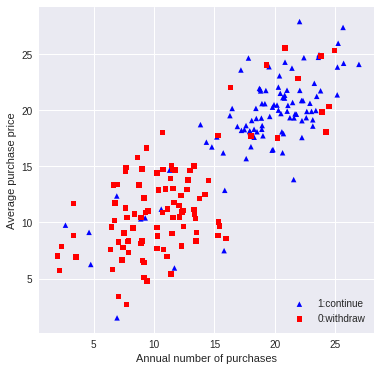

In [1]:
# 模擬データを作成する　x軸:年間購入回数, y軸:平均購入単価

# 1：ライブラリのインポート
import numpy as np  # numpyライブラリをnpという呼び名で使用
import pandas as pd  # pandasライブラリをpdという呼び名で使用
import matplotlib.pyplot as plt  # matplotlib.pyplotをpltという呼び名で使用
%matplotlib inline
np.random.seed(0)  # 乱数のシードを固定

# 2.1：2次元ガウス分布で模擬データ100人分を作成
mean = [10, 10]  # 平均値
cov = [[10, 3], [3, 10]]  # 分散共分散行列
x1, y1 = np.random.multivariate_normal(mean, cov, 100).T  # 2次元データ生成
true_false = np.random.rand(100) > 0.9  # 0-1の一様乱数の10%がTrue
label1 = np.where(true_false, 1, 0)  # Advanced indexingでLabelデータ生成

# 2.2：2次元ガウス分布で模擬データ100人分を作成
mean = [20, 20]  # 平均値
cov = [[8, 4], [4, 8]]  # 分散共分散行列
x2, y2 = np.random.multivariate_normal(mean, cov, 100).T
true_false = np.random.rand(100) > 0.1  # 0-1の一様乱数の90%がTrue
label2 = np.where(true_false, 1, 0)  # Advanced indexingでLabelデータ生成

# 3: データを描画
X = (np.r_[x1, x2])  # 配列の結合
Y = (np.r_[y1, y2])
label = (np.r_[label1, label2])

plt.figure(figsize=(6, 6))
# ラベル1の継続会員とラベル0の退会会員をAdvanced indexingで取り出して描画
plt.scatter(X[label == 1], Y[label == 1], marker='^', s=30,
            c='blue', edgecolors='', label='1:continue')
plt.scatter(X[label == 0], Y[label == 0], marker=',', s=30,
            c='red',  edgecolors='', label='0:withdraw')
plt.xlabel("Annual number of purchases")
plt.ylabel("Average purchase price")
plt.legend(loc="lower right")  # 凡例の出現位置を制御
plt.show()


In [2]:
# 識別器の学習結果をプロットする外部ライブラリをインストール
!pip install mlxtend


    100% |████████████████████████████████| 1.3MB 968kB/s 


正答率 =0.85
新たな顧客のラベルは [1]です。


/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


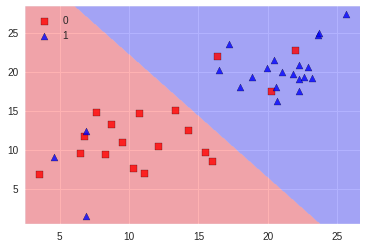

In [3]:
# ①ライブラリのインポート
from sklearn import linear_model, cross_validation, metrics
from mlxtend.plotting import plot_decision_regions  # 識別器の学習結果をプロットする外部ライブラリを利用

# ②訓練データとテストデータの用意
Data = (np.c_[X, Y])
D_train, D_test, label_train, label_test = cross_validation.train_test_split(
    Data, label, test_size=0.2, random_state=0)

# ③モデルの選択と訓練データによる学習（ロジスティック回帰で分類）
clf = linear_model.LogisticRegression()  # 引数デフォルト設定でclassificatorのオブジェクトを生成
clf.fit(D_train, label_train)

# ④テストデータで性能評価
label_pre = clf.predict(D_test)  # テストデータのラベルを識別器でpredicitonする
ac_score = metrics.accuracy_score(label_test, label_pre)  # 正答率を計算
print("正答率 =" + str(ac_score))

plot_decision_regions(D_test, label_test, clf=clf,
                      res=0.01, legend=2)  # #学習した識別平面とテストデータをプロットする

# ⑤未知のデータを分類
label_prenew = clf.predict([[20, 15]]) # 適当なデータ[20,15]を分類
print("新たな顧客のラベルは " + str(label_prenew) + "です。")
# この顧客のラベルは [1]です。と出力されます
